In [1]:
import numpy as np
import matplotlib.pyplot as plt
from read_calibration_file import *
from point_to_point import *

1.0
Transformation C vers A get_icp_solution :
 [[ 7.07106781e-01 -7.07106781e-01  0.00000000e+00  1.69321074e-07]
 [ 7.07106781e-01  7.07106781e-01  0.00000000e+00  9.40672624e-08]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Transformation C vers A connue :
 [[ 0.7071068 -0.7071068  0.         0.       ]
 [ 0.7071068  0.7071068  0.         0.       ]
 [ 0.         0.         0.         0.       ]
 [ 0.         0.         0.         1.       ]]


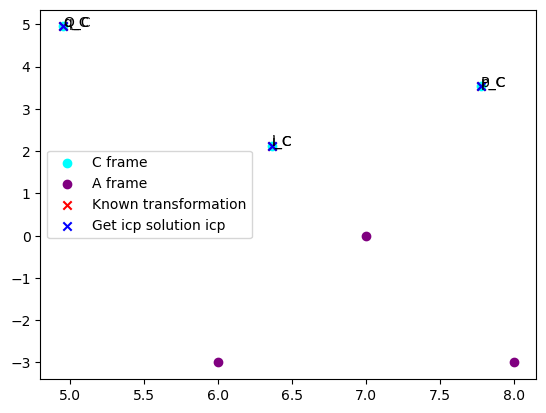

In [4]:
# importing array
p_A = np.array([[8],[-3],[1],[1]], dtype = float)
q_A = np.array([[7],[0],[1],[1]],dtype=float)
i_A = np.array([[6],[-3],[1],[1]])

T_A_C = np.array([[  0.7071068, -0.7071068, 0, 0],
   [0.7071068, 0.7071068, 0, 0],
   [0, 0, 0, 0],
   [0, 0, 0, 1]
     ],dtype=float)

q_C = T_A_C @ q_A
p_C = T_A_C @ p_A
i_C = T_A_C @ i_A

#plotting points

plt.figure()
plt.scatter(q_C[0],q_C[1],c='cyan', label = 'C frame')
plt.scatter(p_C[0],p_C[1],c='cyan')
plt.scatter(i_C[0],i_C[1],c='cyan')

plt.scatter(q_A[0],q_A[1], c='purple', label = 'A frame')
plt.scatter(p_A[0],p_A[1], c='purple')
plt.scatter(i_A[0],i_A[1], c='purple')


#compute transformation

C = np.hstack([p_C,q_C,i_C])
A = np.hstack([p_A,q_A,i_A])

T, C, r = get_icp_solution(A,C)

print('Transformation C vers A get_icp_solution :\n', T)
print('Transformation C vers A connue :\n', T_A_C)

#compute points

q_c = T_A_C @ q_A
p_c = T_A_C @ p_A
i_c = T_A_C @ i_A

Q_C = T @ q_A
P_C = T @ p_A
I_C = T @ i_A


plt.scatter(q_c[0],q_c[1], marker = 'x', c='red', label= 'Known transformation')
plt.scatter(p_c[0],p_c[1],marker = 'x', c='red')
plt.scatter(i_c[0],i_c[1],marker = 'x', c='red')


plt.scatter(Q_C[0],Q_C[1],marker = 'x', c='blue', label= 'Get icp solution icp')
plt.scatter(P_C[0],P_C[1],marker = 'x', c='blue')
plt.scatter(I_C[0],I_C[1],marker = 'x', c='blue')


plt.text(q_C[0],q_C[1], 'q_C')
plt.text(p_C[0],p_C[1], 'p_C')
plt.text(i_C[0],i_C[1], 'i_C')

plt.text(Q_C[0],Q_C[1], 'Q_C')
plt.text(P_C[0],P_C[1], 'P_C')
plt.text(I_C[0],I_C[1], 'I_C')


plt.legend()
plt.show()